### Cirq

En este apartado aparece como se puede construir un circuito en cirq que sirve para provar la teleportación cuantica, en la que pasamos un qubit de q0 a q2 utilizando q1 de mediador.

In [ ]:
import cirq
from cirq import Simulator

Añadimos el entrelazamiento entre los qubits q1 y q2

In [82]:
q0 = cirq.NamedQubit('q0')
q1 = cirq.NamedQubit('q1')
q2 = cirq.NamedQubit('q2')

circ = cirq.Circuit(cirq.H(q1), cirq.CNOT(q1, q2))
print(circ)

q1: ───H───@───
           │
q2: ───────X───


Añadimos las puertas que preparan los qubits q1 y q0 para que q2 los utilicen para crear de nuevo el estado |ψ⟩ original

In [83]:
circ.append(cirq.Moment([cirq.CNOT(q0, q1)]))
circ.append(cirq.H(q0))
print(circ)

q0: ───────────@───H───
               │
q1: ───H───@───X───────
           │
q2: ───────X───────────


Se añaden las puertas que utilizando los valores de q0 y q1 transforman q2 en el estado original que se queria enviar 

In [85]:
def bob_gates(qc, a, b, c):
    qc.append(cirq.CNOT(b, c))
    qc.append(cirq.CZ(a,c))

In [86]:
bob_gates(circ, q0, q1, q2)
print(circ)

q0: ───────────@───H───M───────────@───
               │                   │
q1: ───H───@───X───────────M───@───┼───
           │                   │   │
q2: ───────X───────────────────X───@───


Se mide el ultimo qubit para comprovar su valor y comprovar el correcto envio 

In [87]:
circ.append(cirq.Moment([cirq.measure(q2)]))
print(circ)

q0: ───────────@───H───M───────────@───────
               │                   │
q1: ───H───@───X───────────M───@───┼───────
           │                   │   │
q2: ───────X───────────────────X───@───M───


Se hace la simulacion 1000 veces del circuito para comprovar resultados 

resultados para q2:  Counter({0: 1000})


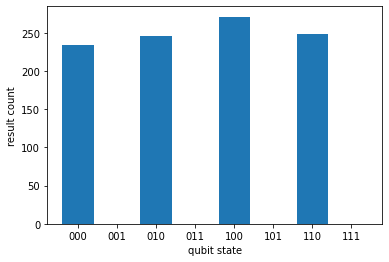

In [88]:
from cirq import Simulator
simulator = Simulator()
result = simulator.run(circ, repetitions=1000)
print('resultados para q2: ',result.histogram(key='q2'))
counts = cirq.plot_state_histogram(result)

Ya que los qubits se inicializan a |0⟩ el estado final del qubit q2 siempre es 0 como podemos comprobar en los resultados para q2.

Ademas podemos observar en el histograma que el valor de q2 representados por el tercer bit siempre es cero, aunque q1 y q2 pueden variar, pero estos valores no son de vital importancia.